In [1]:
#モジュールのインポート
from control.matlab import *
import sympy as sp#文字式計算のモジュール
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.family'] ='sans-serif' #使用するフォント
plt.rcParams['xtick.direction'] = 'in' #x軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams['ytick.direction'] = 'in' #y軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams['xtick.major.width'] = 1.0 #x軸主目盛り線の線幅
plt.rcParams['ytick.major.width'] = 1.0 #y軸主目盛り線の線幅
plt.rcParams['font.size'] = 10 #フォントの大きさ
plt.rcParams['axes.linewidth'] = 1.0 # 軸の線幅edge linewidth。囲みの太さ
plt.rcParams['mathtext.default'] = 'regular'
plt.rcParams['axes.xmargin'] = '0' #'.05'
plt.rcParams['axes.ymargin'] = '0.05'
plt.rcParams['savefig.facecolor'] = 'None'
plt.rcParams['savefig.edgecolor'] = 'None' 

In [2]:
def linestyle_generator():
    linestyle = ['-', '--', '-.', ':']
    lineID = 0
    while True:
        yield linestyle[lineID]
        lineID = (lineID + 1) % len(linestyle)
def plot_set(fig_ax, *args):
    fig_ax.set_xlabel(args[0])
    fig_ax.set_ylabel(args[1])
    fig_ax.grid(ls=':')
    if len(args)==3:
        fig_ax.legend(loc=args[2])
def bodeplot_set(fig_ax, *args):
    fig_ax[0].grid(which="both", ls=':')
    fig_ax[0].set_ylabel('Gain [dB]')

    fig_ax[1].grid(which="both", ls=':')
    fig_ax[1].set_xlabel('$\omega$ [rad/s]')
    fig_ax[1].set_ylabel('Phase [deg]')
    
    if len(args) > 0:
        fig_ax[1].legend(loc=args[0])
    if len(args) > 1:
        fig_ax[0].legend(loc=args[1])

## 一次遅れ系

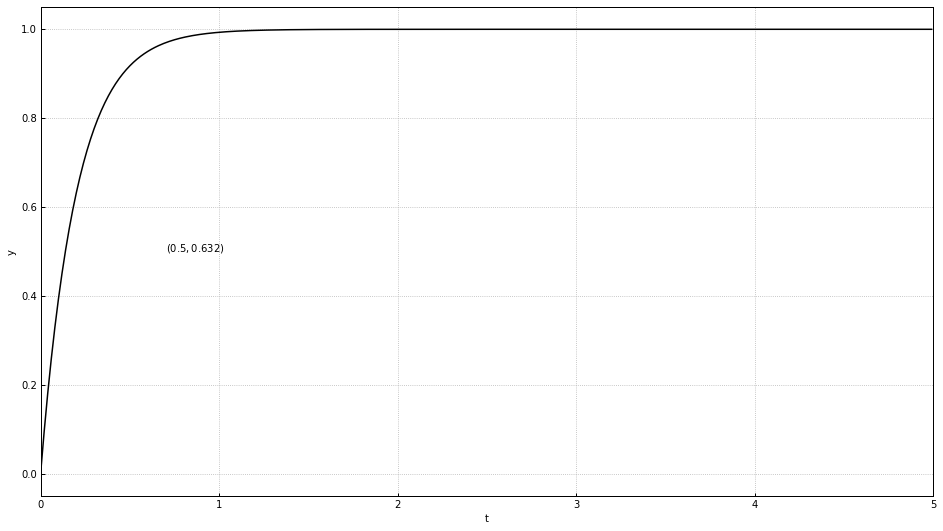

In [3]:
def cross_lines(x, y, **kwargs):
    ax = plt.gca()
    ax.axhline(y, **kwargs)
    ax.axvline(x, **kwargs)
    ax.scatter(T, 0.632, **kwargs)
#**kwargs::複数のキーワードを辞書として受け取れる（関数内でよく使う）今回の場合では**kwargsはmatplotlibの設定を持っている。色とかね
fig, ax = plt.subplots(figsize=(16,9))

(t,k)=(0.2,1)
p=tf([0,k],[t,1])
y, t = step(p, np.arange(0, 5, 0.01))
ax.plot(t,y, color='k')

#cross_lines(T, 0.632, color='k',lw=0.5)
ax.annotate('$(0.5, 0.632)$', xy=(0.7, 0.5))

ax.set_xticks(np.linspace(0, 5, 6))
plot_set(ax, 't', 'y')

# 2次遅れ系

ymax= 1.2538267219801087
Tp= 0.6855517208472576


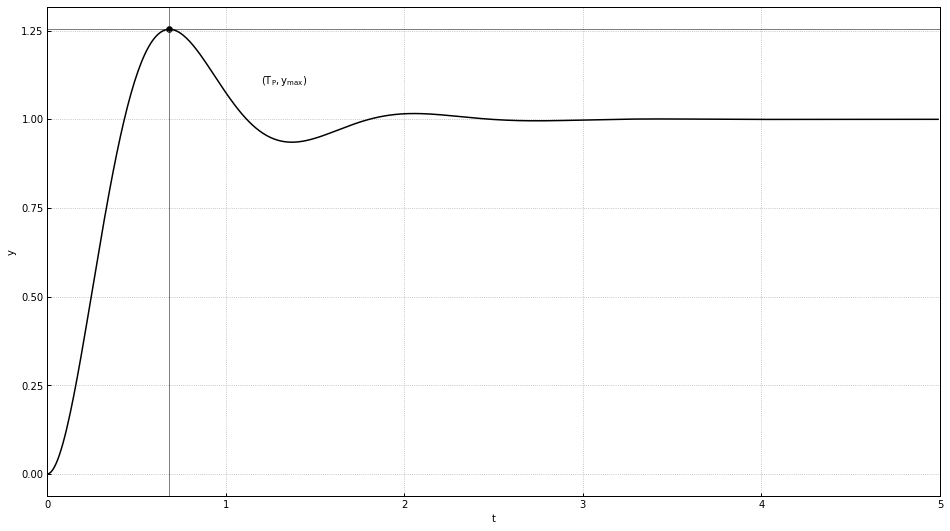

In [4]:
def cross_lines(x, y, **kwargs):
    plt.gca()
    ax.axhline(y, **kwargs)
    ax.axvline(x, **kwargs)
    ax.scatter(x, y, **kwargs)
    
(zeta, omega_n) = (0.4, 5)#減衰係数と固有角周波数の決定

fig, ax = plt.subplots(figsize=(16,9))
#二次遅れ系のステップ応答
P = tf([0,omega_n**2], [1, 2*zeta*omega_n, omega_n**2])
y, t = step(P, np.arange(0,5,0.01))
ax.plot(t,y, color='k')

ymax = 1 + 1 * np.exp(-(np.pi*zeta)/np.sqrt(1-zeta**2))
Tp = np.pi/omega_n/np.sqrt(1-zeta**2)
cross_lines(Tp, ymax, color='k',lw=0.5)

ax.annotate('$(T_P, y_{max})$', xy=(1.2, 1.1))

print('ymax=',ymax)
print('Tp=', Tp)

ax.set_xticks(np.arange(0, 5.2, step=1.0))
ax.set_yticks(np.arange(0, 1.3, step=0.25))
plot_set(ax, 't', 'y')

# fig.savefig("2nd_step0.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)

### 練習問題(1)


    s + 3
-------------
s^2 + 3 s + 2



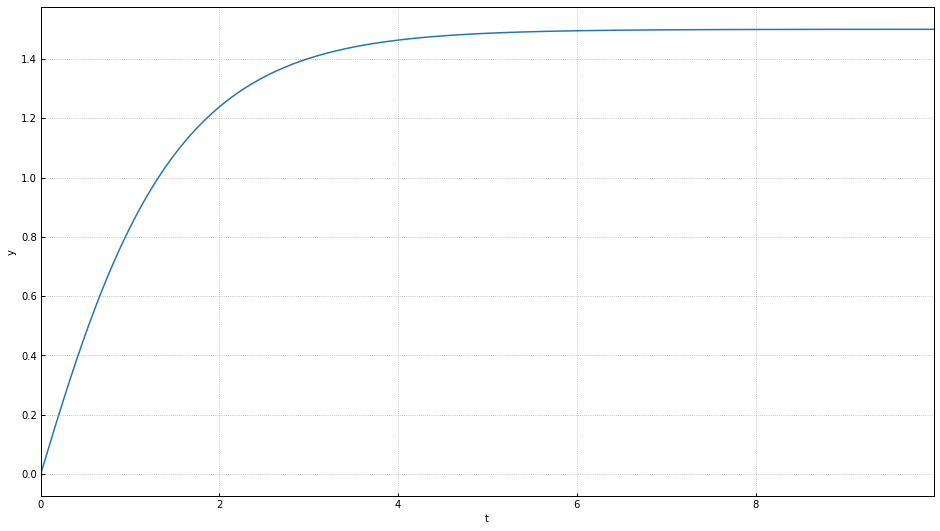

In [5]:
P1 = tf([1, 3], [1, 3, 2])
print(P1)

fig, ax = plt.subplots(figsize=(16,9))
y, t = step(P1, np.arange(0, 10, 0.01))
    
ax.plot(t, y)
plot_set(ax, 't', 'y')

### 練習問題(2)


          1
---------------------
s^3 + 2 s^2 + 2 s + 1



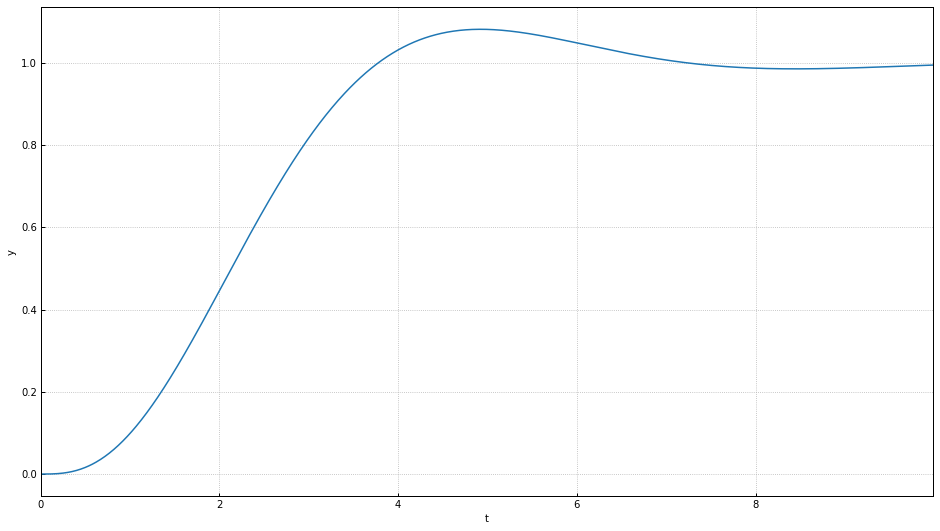

In [6]:
P1 = tf([1], [1, 2, 2,1])
print(P1)

fig, ax = plt.subplots(figsize=(16,9))
y, t = step(P1, np.arange(0, 10, 0.01))
    
ax.plot(t, y)
plot_set(ax, 't', 'y')

## 零点が与える影響

c:\users\takuma\nabepy\env\lib\site-packages\control\timeresp.py:293: UserWarning: return_x specified for a transfer function system. Internal conversion to state space used; results may meaningless.
  warnings.warn(
c:\users\takuma\nabepy\env\lib\site-packages\control\timeresp.py:293: UserWarning: return_x specified for a transfer function system. Internal conversion to state space used; results may meaningless.
  warnings.warn(
c:\users\takuma\nabepy\env\lib\site-packages\control\timeresp.py:293: UserWarning: return_x specified for a transfer function system. Internal conversion to state space used; results may meaningless.
  warnings.warn(


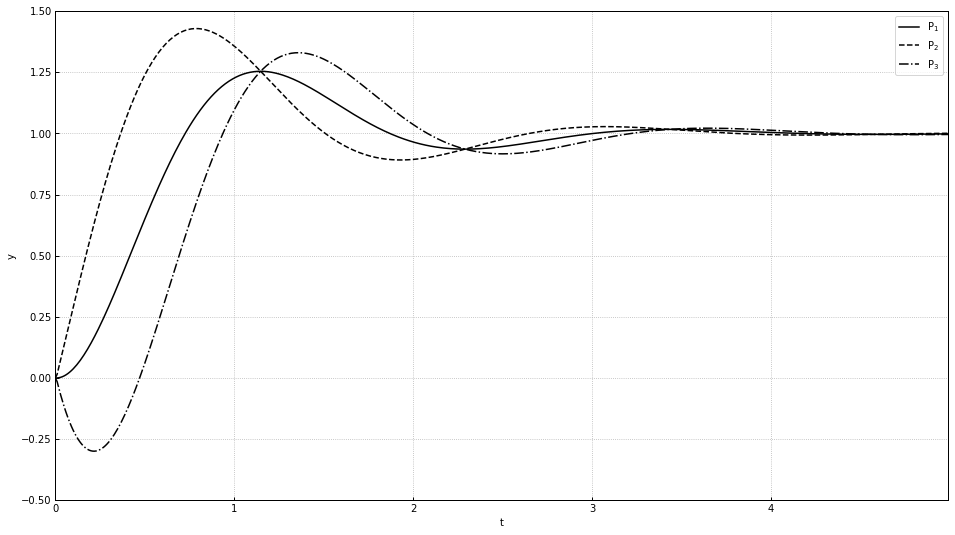

In [7]:
fig, ax = plt.subplots(figsize=(16, 9))

Td = np.arange(0,5,0.01)
Ud = 1 * (Td > 0.0)

zeta = .4
omega_n = 3

LS=linestyle_generator()

P = tf([ 0, omega_n**2],[1, 2*zeta*omega_n, omega_n**2])
y, t, x0 = lsim(P, Ud, Td, 0)
ax.plot(t,y, ls = next(LS), label='$P_1$', c='k')

P = tf([ 3, omega_n**2],[1, 2*zeta*omega_n, omega_n**2])
y, t, x0 = lsim(P, Ud, Td, 0)
ax.plot(t,y,ls = next(LS), label='$P_2$', c='k')

P = tf([-3, omega_n**2],[1, 2*zeta*omega_n, omega_n**2])
y, t, x0 = lsim(P, Ud, Td, 0)
ax.plot(t,y, ls = next(LS), label='$P_3$', c='k')

ax.set_ylim(-0.5,1.5)
plot_set(ax, 't', 'y', 'best')

# fig.savefig("fig_step6.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)

### 周波数応答

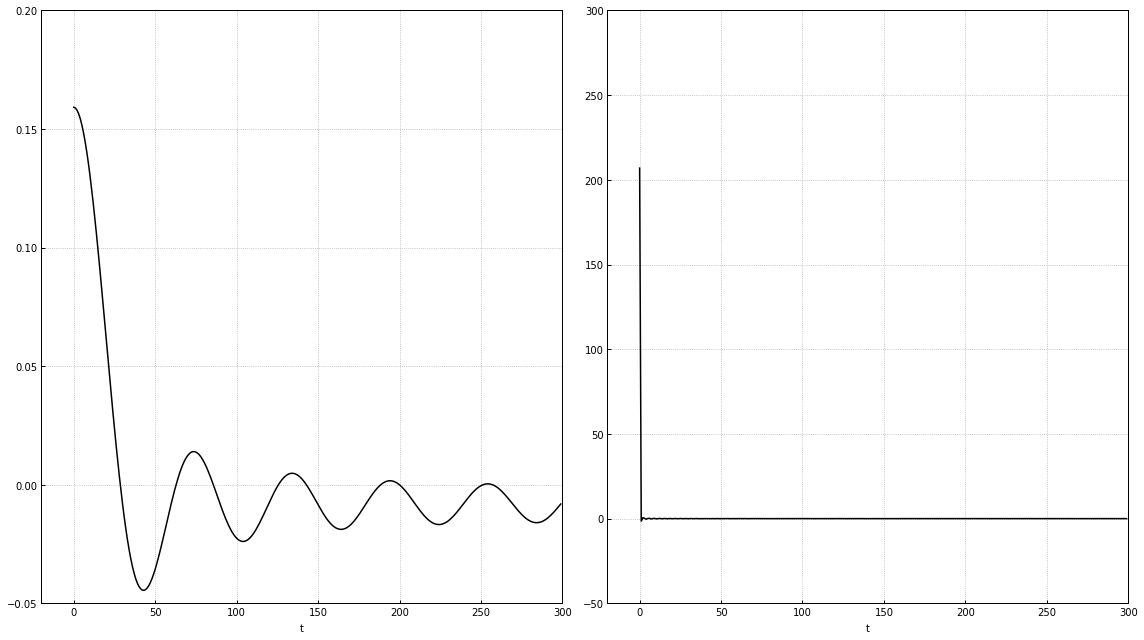

In [8]:
#余弦波をたくさん重ねてインパルス応答を再現
t = np.arange(0, 3, 0.01)

fig, ax = plt.subplots(1, 2, figsize=(16, 9)) 

u = 0 * t
for i in range(0,10):
    u = u + (0.1/2/np.pi)*np.cos(t * (i+1))
ax[0].plot(u, color='k')

u = 0 * t
for i in range(0,13000):
    u = u + (0.1/2/np.pi)*np.cos(t * (i+1))
ax[1].plot(u, color='k')

ax[0].set_xlim(-20, 300)
ax[0].set_ylim(-0.05, 0.2)
ax[0].grid(ls=':')

ax[1].set_xlim(-20, 300)
ax[1].set_ylim(-50, 300)
ax[1].grid(ls=':')

ax[0].set_xlabel('$t$')
ax[1].set_xlabel('$t$')

fig.tight_layout()
#fig.savefig("impluse_cos.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)

### 周波数の上昇によるゲインの減少、位相遅れ

c:\users\takuma\nabepy\env\lib\site-packages\control\timeresp.py:293: UserWarning: return_x specified for a transfer function system. Internal conversion to state space used; results may meaningless.
  warnings.warn(
c:\users\takuma\nabepy\env\lib\site-packages\control\timeresp.py:293: UserWarning: return_x specified for a transfer function system. Internal conversion to state space used; results may meaningless.
  warnings.warn(
c:\users\takuma\nabepy\env\lib\site-packages\control\timeresp.py:293: UserWarning: return_x specified for a transfer function system. Internal conversion to state space used; results may meaningless.
  warnings.warn(
c:\users\takuma\nabepy\env\lib\site-packages\control\timeresp.py:293: UserWarning: return_x specified for a transfer function system. Internal conversion to state space used; results may meaningless.
  warnings.warn(


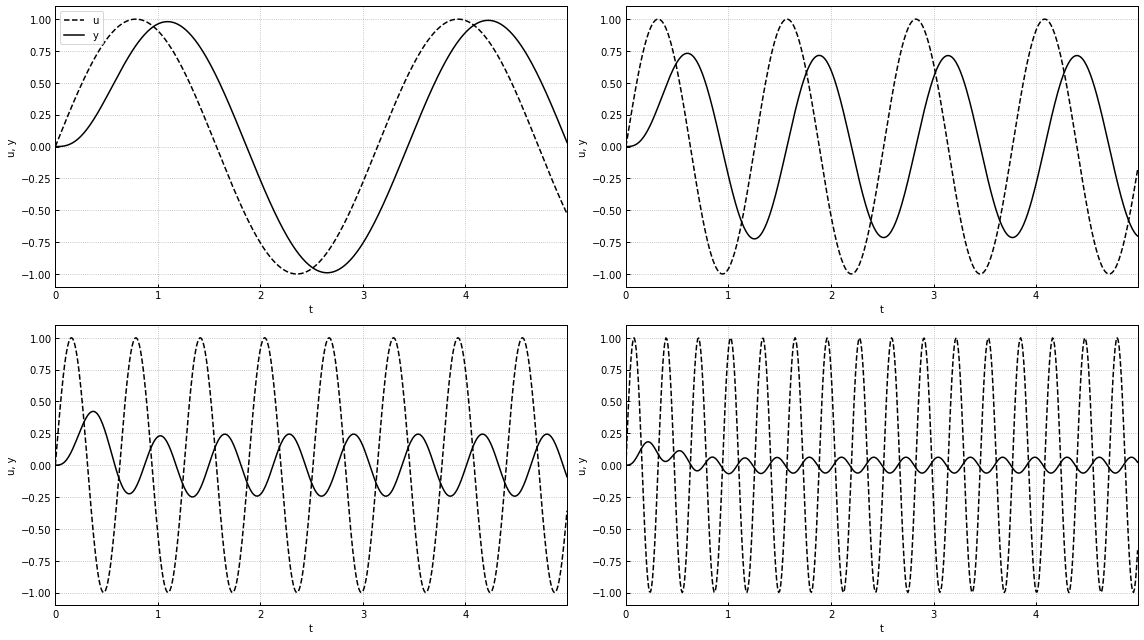

In [10]:
fig, ax = plt.subplots(2,2,figsize=(16,9)) 

zeta = 0.7
omega_n = 5
P = tf([0,omega_n**2],[1, 2*zeta*omega_n, omega_n**2])

freq = [2, 5, 10, 20]
Td = np.arange(0, 5, 0.01)
for i in range(2):
    for j in range(2):
        u = np.sin(freq[2*i+j]*Td)
        y, t, x0 = lsim(P, u, Td, 0)
    
        ax[i,j].plot(t, u, ls='--', label='u', color='k')
        ax[i,j].plot(t, y, label='y', color='k')
        plot_set(ax[i,j], 't', 'u, y')

ax[0,0].legend()
fig.tight_layout()
#fig.savefig("freq_resp.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)